#### 목표
- BMI 데이터를 활용하여 머신러닝의 전체 과정을 이해하자

#### 머신러닝의 7과정
1. 문제 정의
2. 데이터 수집(File 다운로드, Survey, Database, IoT sensor)
3. 데이터 전처리✨
    - 결측치, 이상치, 특성공학(Scaling, Encoding, Binning, Transform)
4. EDA
    - 기술통계량 확인, 시각화
    - > 이상치가 발견되면 다시 전처리 단계로 돌아가야 함
5. Model 선택, Hyper Parameter 조정
6. Model 학습(Fit)
7. Modle 평가(Evaluate)

##### 1. 문제 정의
- 500명의 키와 몸무게, 비만도가 있는 데이터를 활용하여 비만도를 예측하는 모델을 생성하자!
- 문제 데이터 : 키, 몸무게
- 정답 데이터 : label(6개의 종류) - 범주형 데이터(다중분류)

##### 2. 데이터 수집
- 데이터 제공(데이터 불러오는 작업)

In [1]:
# 라이브러리 불러오기
import pandas as pd # 행과 열을 가진 데이터를 활용 도구
import matplotlib.pyplot as plt # EDA 단계에서 시각화를 위한 도구

In [2]:
# 데이터 불러오기 : read_csv(경로/파일명, 속성값으로 index_col을 해줘야함)
# data라는 변수에 bmi 넣어주기
# 조건 : label 컬럼을 인덱스로 사용해서 불러와주기
data = pd.read_csv('data/bmi_500.csv', index_col = 'Label')

In [3]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [6]:
# 데이터 크기 확인하기
data.shape   # (행, 열)을 결과값으로 돌려줌
# 통계학에서는 이 결과를 '관측치'라고 말하기도 함

(500, 3)

In [9]:
# 결측치 확인하기
# => 위 표에 ...으로 표현되어있는 데이터들 중 빈 칸이 있을 수도 있으니 반드시 확인 필요함

# 데이터의 정보 확인하기
data.info()
# => 행과 열에 대한 정보, 결측치(null) 여부 확인 가능
# non-null count값을 확인해서 결측치의 여부 확인 가능
# non-null count => 값이 채워져 있는 행의 개수 확인 가능
# Dtype을 통해서는 데이터 타입 확인 가능 - 머신러닝 학습 시 숫자 형태의 데이터 활용

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


##### 3. 데이터 전처리
- data.info()를 통해서 결측치가 없다라는 걸 확인했으니 => 데이터 전처리 단계 PASS

##### 4. EDA(탐색적 데이터 분석, Exploratoy Data Analysis)
- 데이터 셋을 분석하고 조사하여 주요 특성을 파악하는 과정
- 기술 통계량 확인
- 시각화를 통해서 데이터 분포 현황 파악

In [12]:
# 기술 통계량 확인하기 (describe : 기술하다, 작성하다)
data.describe()
# describe는 숫자데이터만 보여짐
# count : 데이터의 개수
# mean : 데이터의 평균값
# std : 분산
# min, max : 최소값, 최대값
# 수치(25%, 50%, 75%) : 4분위수 - 50%(중앙값, 중위수)

# describe를 통해서 평균값과 중앙값(중위값)을 확인해 본 결과
# 차이가 많이 안나는 걸 확인할 수 있는데 이상치가 없음을 유추할 수 있다!
# (=> 전처리 단계로 돌아가지 않아도 되지만 시각화로 한 번 더 확인하는 것이 좋음)

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [15]:
# 클래스(Class)의 개수 : 정답 데이터의 카테고리 개수
# 클래스(Class) - 명시적인 답
# Label(정답 데이터) 확인
# 범주형 데이터 -> 분류 모델 사용
data.index.unique()
# unique : 중복되지 않은 하나의 값을 볼 수 있도록 해주는 함수

# 6개의 클래스를 가진다.(Obesity, Normal ...)
# 6개의 클래스(카테고리) 중 1개의 값을 예측하면 된다!

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [16]:
# 각 클래스의 등장 횟수 확인 : value_counts()
# data.index :정답 데이터 확인 가능
data.index.value_counts()
# => Extreme Obesity, Obesity 데이터가 편중되어있는 편 (골고루 분포되어 있지 않음)
# 정답 데이터는 되도록이면 다양성을 유지하는 것이 좋음 => 정확도가 올라감(새로운 데이터가 나왔을 때)

Label
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

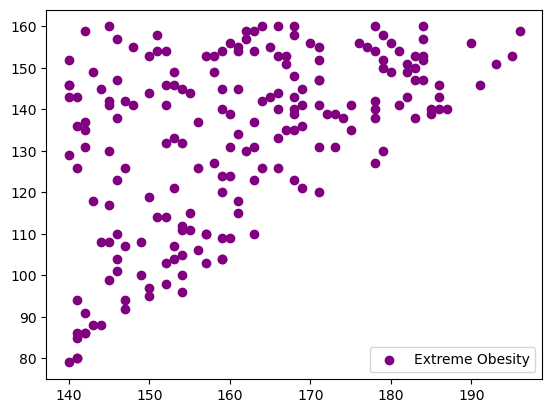

In [40]:
# 산점도(Scatter) : 분산의 정도를 점을 찍어서 확인하는 분포표
# 데이터 시각화 (BMI 레이블 별의 분포 현황 시각화)
eo = data.loc['Extreme Obesity']
# 인덱싱 - 인덱서(loc, iloc)
# loc : 인덱서 이름을 통해 가져옴
# iloc- 인덱서 값을 통해 가져옴

# plt.scatter(x축/키 , y축/몸무게 , c = '' , label = 'Extreme Obesity')
plt.scatter(eo['Height'], eo['Weight'], c='purple', label = 'Extreme Obesity')
# Extreme Obesity라는 마크를 보여주려면 아래 두 줄을 적어줘야 확인 가능
plt.legend()   # 범주값을 보기 위해
plt.show()

#### 실습

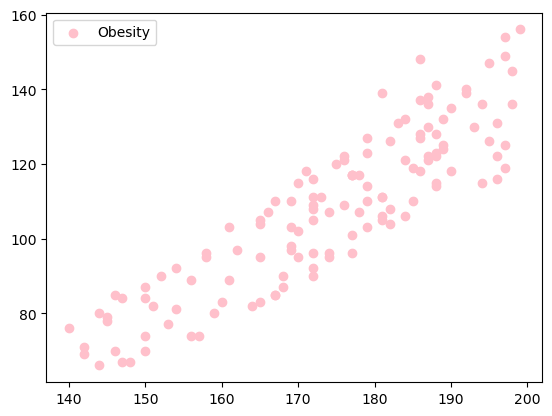

In [26]:
# 비만 클래스에 대해서 산점도 직접 그려보자!
o = data.loc['Obesity']
plt.scatter(o['Height'], o['Weight'], c = 'pink', label = 'Obesity')
plt.legend()
plt.show()

In [34]:
# 동일한 작업을 여러 번 진행하기 때문에 위 작업을 함수화 해보자
# 함수 정의하기
def graph_draw (label, color) :   # 매개변수 2개 설정 - label명, 산점도 색상
    d = data.loc[label]
    plt.scatter(d['Height'], d['Weight'], c = color, label = label)

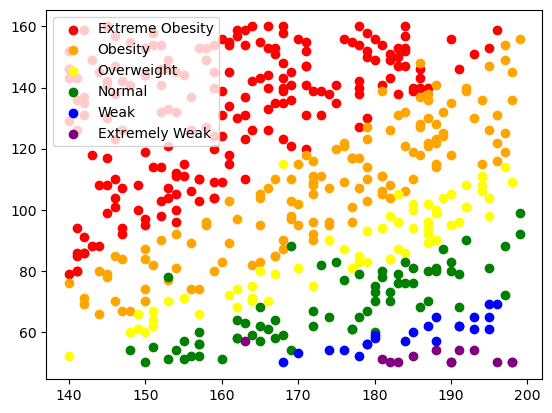

In [38]:
# 함수 호출 - 6개 레이블에 대해서 산점도를 찍어보는 작업
graph_draw('Extreme Obesity', 'red')
graph_draw('Obesity', 'orange')
graph_draw('Overweight', 'yellow')
graph_draw('Normal', 'green')
graph_draw('Weak', 'blue')
graph_draw('Extremely Weak', 'purple')
plt.legend()
plt.show()

# 그래프를 확인하여 전처리에 대해서 생각을 해봐야한다
# 분석 내용
# → 노란색 과체중 데이터가 비만 쪽에 한 개 있기는 하지만 크게 영향을 미치지 않을 것으로 보고 모델 학습 진행
# → 정확도를 더 높이고 싶다면 다시 돌아와 이상치 처리해 줄 것!

##### 데이터 분리
- 문제 데이터(X), 정답 데이터(y)로 나눠주기
    - X : 문제 데이터, feature, 특성, 속성
    - y : 정답 데이터, label, class, target
- 학습용(train), 테스트용(test) 데이터로 나누기
    - 대부분 7:3정도의 비율로 분리해준다

In [101]:
# 문제 데이터, 정답 데이터 분리
# X(변수) - 문제 데이터 (Height, Weight)
# y - 정답 데이터 (label → index_col)

# 1) X = data.loc[ : ,'Height':'Weight'] → 슬라이싱 방법
# 2)
X = data[['Height','Weight']]
y = data.index

# 잘 담아졌는지 각각 확인하기 (크기 확인: shape)
print('문제 데이터: ', X.shape)
print('정답 데이터: ', y.shape)
X

문제 데이터:  (500, 2)
정답 데이터:  (500,)


,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61
...,...,...
Extreme Obesity,150,153
Obesity,184,121
Extreme Obesity,141,136


In [62]:
# train, test (70:30) 분리
# 한정적인 데이터 내에서 학습과 평가까지 진행해야 하기 때문에 평가 데이터를 남겨주는 것!

# 훈련용 데이터 셋 70% - 350개 사용 (0 - 349) 잘라서 가져오기
X_train = X.iloc[ :350, : ]   # 훈련용 문제 데이터 (iloc - 끝점 포함 안 함)
y_train = y[ :350]   # 훈련용 정답 데이터

# 테스트용 데이터 셋 30% - 150개 사용 (인덱스 350 - 500) 잘라서 가져오기
X_test = X.iloc[350:500 , : ]
y_test = y[350:500]
# 확인을 했을 때 350이라는 숫자들과 150이라는 숫자들과 2라는 숫자들은 같아야 함 (다른 예시였더라도?)

# 크기 확인하기
print('훈련용 문제 : ', X_train.shape)
print('훈련용 정답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 문제 : ', y_test.shape)

훈련용 문제 :  (350, 2)
훈련용 정답 :  (350,)
테스트용 문제 :  (150, 2)
테스트용 문제 :  (150,)


##### 5. 모델 선택 및 하이퍼 파라미터 선택
- 모델의 개념에 집중하기 보다는 전체적인 과정을 이해해보자!

In [64]:
# 머신러닝을 위한 라이브러리 불러오기 - 사이킷런(scikit-learn)
from sklearn.neighbors import KNeighborsClassifier   # Knn 분류 모델
from sklearn.metrics import accuracy_score   # 정확도 측정 도구가 담겨있음

# 모델 객체 생성
knn_model = KNeighborsClassifier()
- Shift + Tab => 

In [108]:
# 하이퍼 파라미터 조정(변경)해주기
knn_model = KNeighborsClassifier(n_neighbors = 5)   
# n_neighbors = ? : 내 주변에 있는(나와 가장 근접해 있는) 몇 개(?)의 데이터만 확인하여 결정
# 내 주변에 있는 가장 가까운 데이터들 중 다수결로 결정(분류)
# 분류 - 다수결 , 회귀 - 평균값으로 예측

##### 6. 모델 학습
- model.fit(훈련용 문제 데이터, 훈련용 정답 데이터)
- model.fit(X_train, y_train)

In [105]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
# 모델이 예측하는 값 확인
# 얼마나 잘 예측하는 지 확인하는 과정
# model.predict(X_test)
pre = knn_model.predict(X_test)
pre

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

##### 7. 모델 평가
- 모델 평가 도구 활용

In [107]:
# accuracy_score(모델 예측값, 테스트용 실제 정답) : 정확도 확인 도구
accuracy_score(pre, y_test)
# accuracy_score()는 1에 가까울수록 정확도가 높다
# => 약 90.6%의 정확도를 가진다는 것을 확인할 수 있음
# 5단계에서 하이퍼 파라미터를 'n_neighbors = 숫자' 이렇게 조절해줄 수 있음

0.9066666666666666